## **APRENDIZAJE NO SUPERVISADO**

### **Métricas de evaluación de clustering**

En esta práctica veremos las métricas `elbow` y `silhouette`. Ya sobre el final, veremos un ejemplo de aplicabilidad de K-means en compresión de imágenes.

Para empezar, nuevamente generamos tres datasets sintéticos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.datasets import make_blobs, make_moons

sns.set()

In [3]:
# Creamos los tres datasets. Al ser sintéticos, ya sabemos la cantidad de clusters y la etiqueta de salida de cada registro

n_samples = 2000
n_centros = 8

X1, y1 = make_blobs(n_samples=n_samples, centers=n_centros, cluster_std=0.3, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=n_samples, centers=n_centros, cluster_std=0.6, n_features=2, random_state=2)

# Preparamos un dataset con clusters que no sean simétricos
random_state = 170
X, y3 = make_blobs(n_samples=n_samples, centers=n_centros, cluster_std=0.6, random_state=3)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X3 = np.dot(X, transformation)

Procedemos a visualizarlos

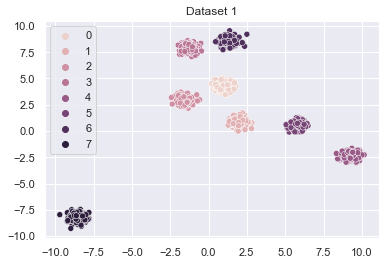

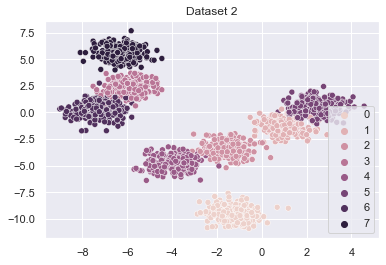

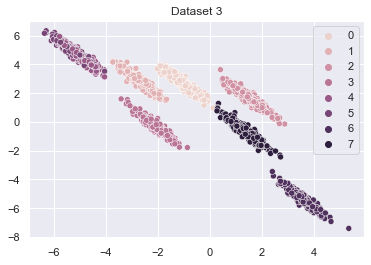

In [4]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1, legend ='full')
plt.title('Dataset 1')
plt.show()

sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2, legend ='full')
plt.title('Dataset 2')
plt.show()

sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3, legend ='full')
plt.title('Dataset 3')
plt.show()

## **K-means**

### **`Elbow`**

Utilizamos la distancia al centroide. Luego, graficamos la curva que nos permite determinar el K óptimo.

In [5]:
# Creamos una lista donde iremos guardando las distancias medias
Sum_of_squared_distances = []

# Entrenamos un modelo para cada número de cluster que queremos testear
K = np.arange(2,14)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X1.shape[0])
    Sum_of_squared_distances.append(distancia_media)

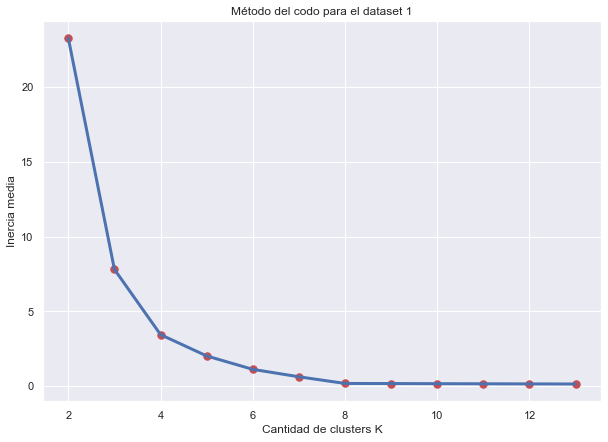

In [6]:
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el dataset 1')

plt.show()

Repetimos el proceso para el dataset 2 y 3.

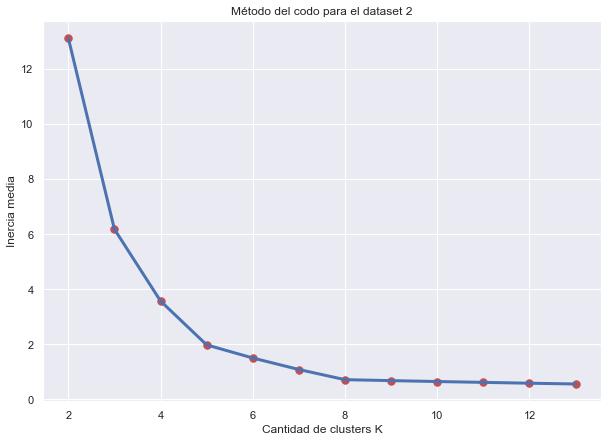

In [7]:
Sum_of_squared_distances = []

for k in K:

    km = KMeans(n_clusters=k)
    km = km.fit(X2)

    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X2.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el dataset 2')

plt.show()

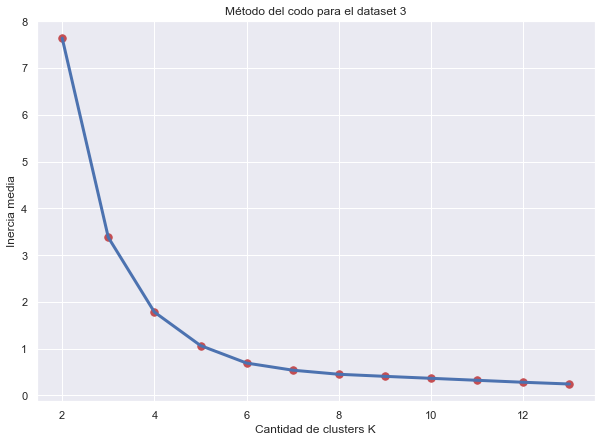

In [8]:

Sum_of_squared_distances = []

for k in K:

    km = KMeans(n_clusters=k)
    km = km.fit(X3)

    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X3.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el dataset 3')

plt.show()

### **`Silhouette`**

Primero vamos a calcular únicamente el valor de silhouette promedio para distintos valores de K. La manera de hacerlo es igual a la que usamos para calcular los valores de distancia media.

Debemos recorrer con un bucle los distintos modelos e ir agregando a una lista los valores de silhouette.

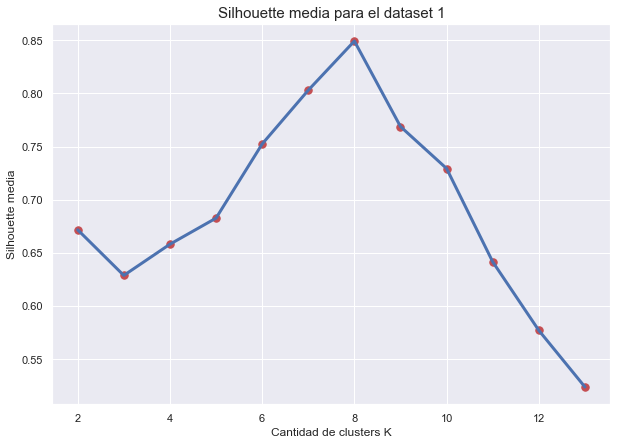

In [8]:
# Creamos una lista donde iremos guardando los valores medios de silhouette
lista_sil = []

# Entrenamos un modelo para cada número de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X1, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el dataset 1', fontsize = 15)

plt.show()

**Repetimos para el dataset 2 y 3**.

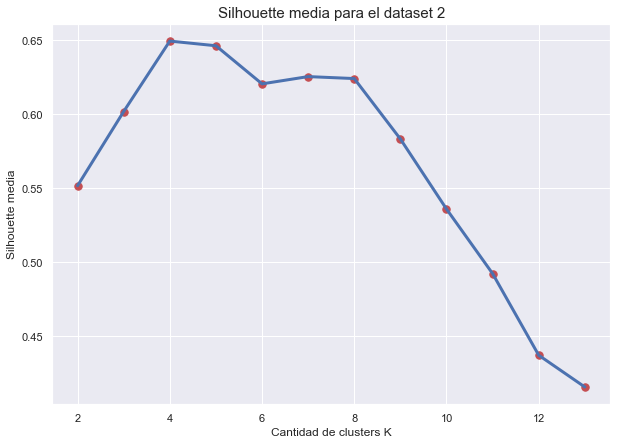

In [9]:
lista_sil = []

for k in range(2,14):

    km = KMeans(n_clusters=k)
    km = km.fit(X2)
    

    etiquetas = km.labels_
    
    valor_medio_sil = silhouette_score(X2, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el dataset 2', fontsize= 15)

plt.show()

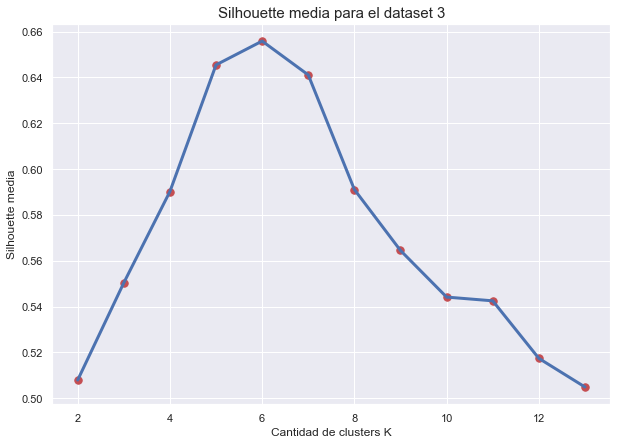

In [10]:
lista_sil = []

for k in range(2,14):

    km = KMeans(n_clusters=k)
    km = km.fit(X3)
    
    etiquetas = km.labels_
    
    valor_medio_sil = silhouette_score(X3, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el dataset 3', fontsize = 15)

plt.show()

**Con el siguiente código, generamos los gráficos silhouette para todas las instancias**. La linea punteada verde indica el valor medio.

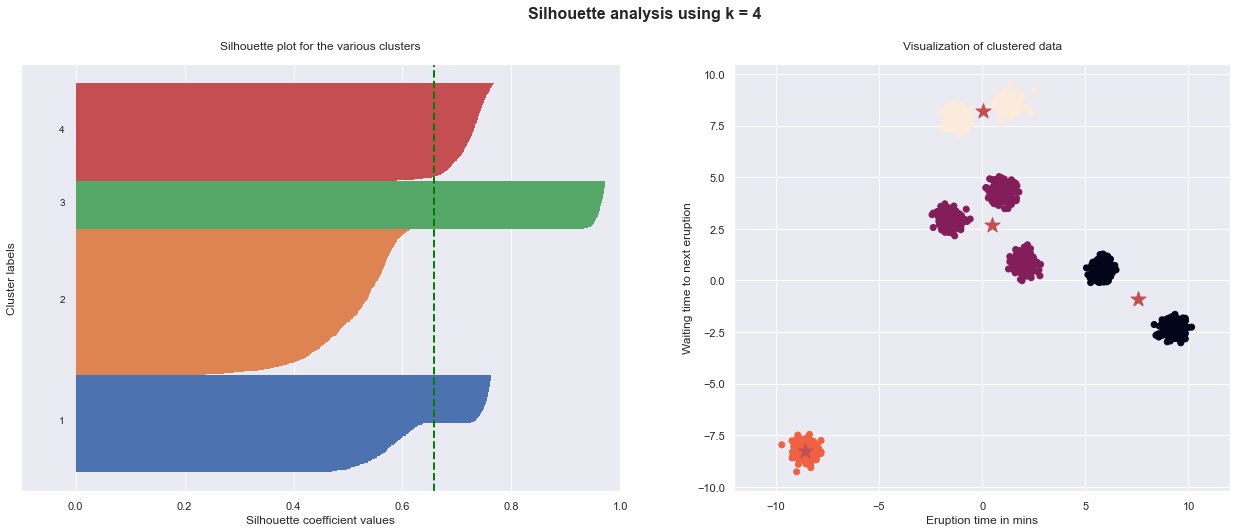

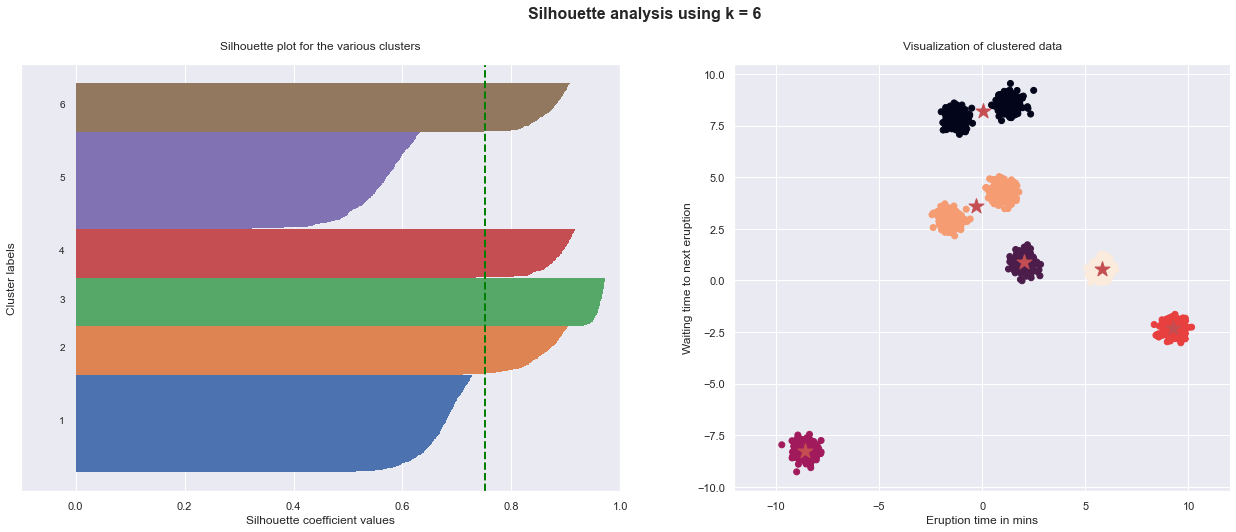

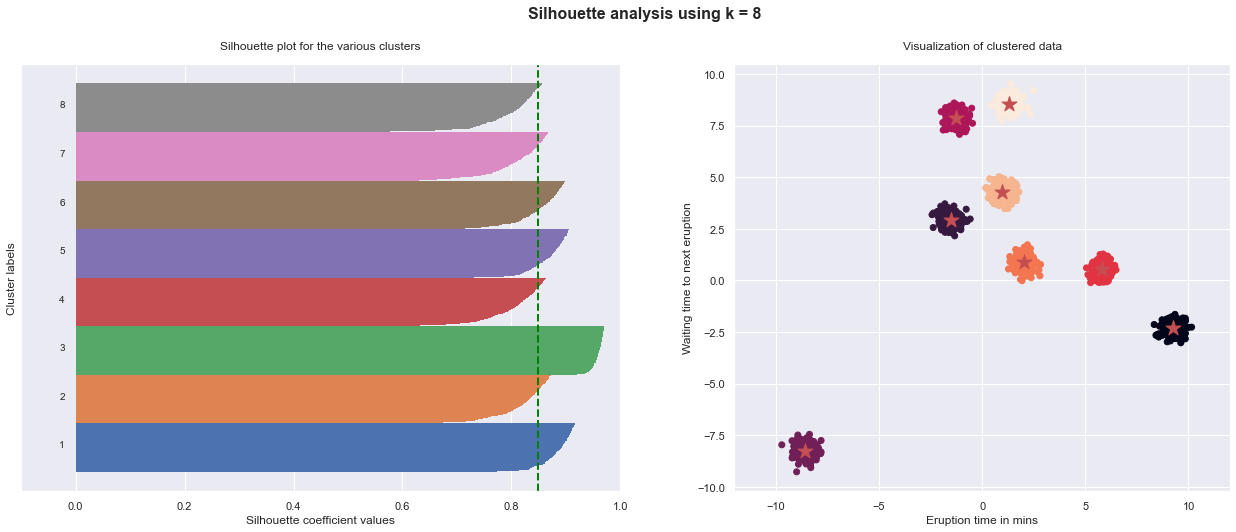

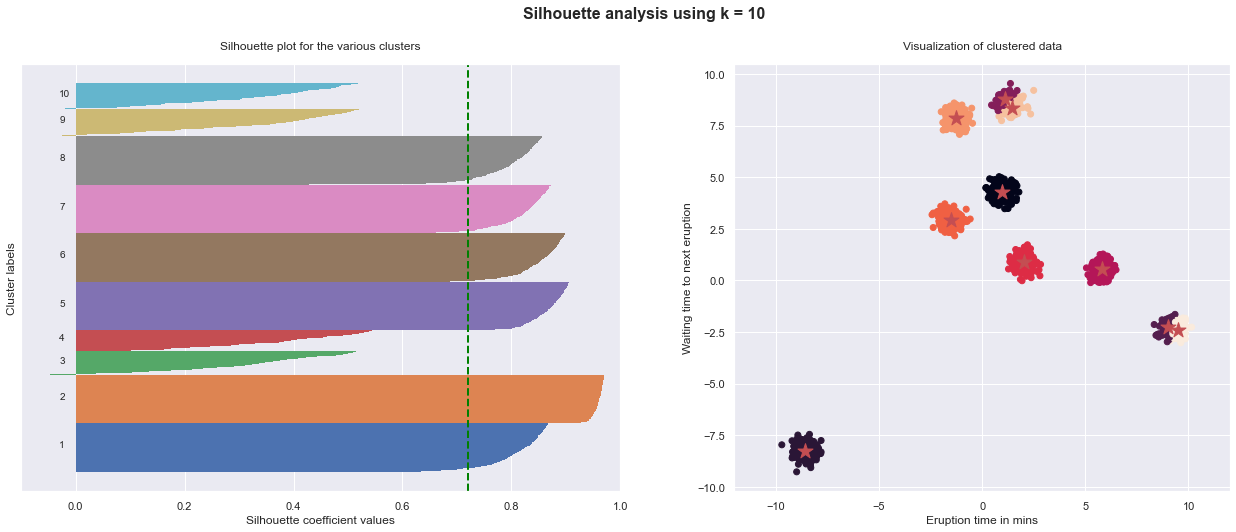

In [11]:
# Ingresamos el Dataset con el que queremos trabajar
X_std = X1

# Definimos la lista de los K que queremos graficae
lista_k = [4, 6, 8, 10]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Instanciamos el modelo
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

- - -

## **DBSCAN**

In [12]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=10)
db.fit(X1)

DBSCAN(min_samples=10)

In [13]:
labels_db = db.labels_

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = list(labels_db).count(-1)

In [14]:
print('Número estimado de clusters: %d' % n_clusters_db)
print('Número estimado de puntos de ruido: %d' % n_noise_db)

Número estimado de clusters: 8
Número estimado de puntos de ruido: 2


In [15]:
# Creamos la función para graficar

def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):


    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True

    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:

            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Número estimado de clusters: %d' % n_clusters_1)
    plt.show()

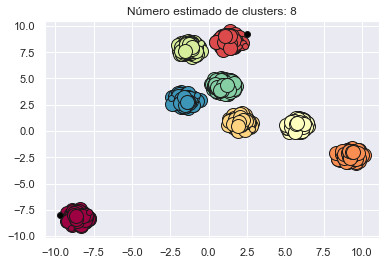

In [16]:
plot_DBSCAN(X1,labels_db,db,n_clusters_db)

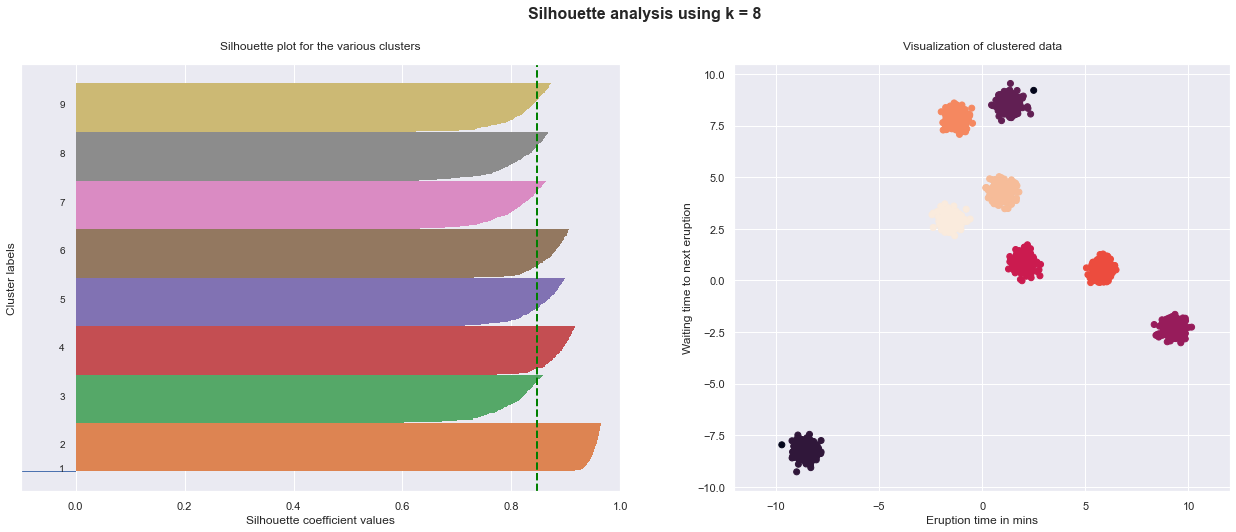

In [17]:
X_std = X1

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

labels = db.labels_

silhouette_vals = silhouette_samples(X_std, labels)


y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)


avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);


ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)

ax2.set_xlim([-12, 12])
ax2.set_xlim([-12, 12])
ax2.set_xlabel('Eruption time in mins')
ax2.set_ylabel('Waiting time to next eruption')
ax2.set_title('Visualization of clustered data', y=1.02)
ax2.set_aspect('equal')
plt.tight_layout()
plt.suptitle(f'Silhouette analysis using k = {n_clusters_db}',
             fontsize=16, fontweight='semibold', y=1.05);

- - -

### *Ejemplo de aplicación de K-means*

Como vimos en la teoría, una de las funcionalidades del algoritmo K-means reside en la **`compresión`**.

Observemos cómo trabaja a la hora de comprimir una imagen. Si lo desean, pueden probar con la imagen que ustedes quieran)

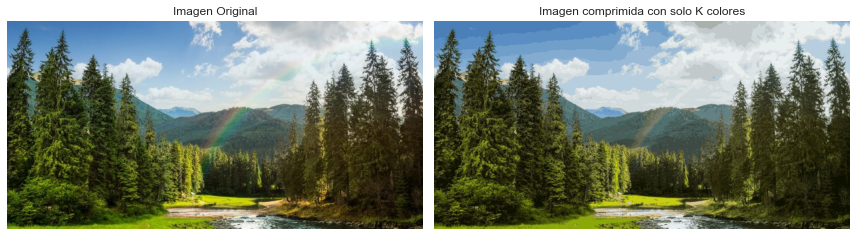

In [19]:
from matplotlib.image import imread

# Importamos la imagen que queremos comprimir
img = imread('../DataSets/bosque.jpg')
img_size = img.shape

# Definimos el numero de Clusters
K= 40

# Cambiamos sus dimensiones para que nos queden como instancias (filas) los pixeles
# y como features (columnas) el valor correspondiente a Red, Blue y Green de cada uno.
X = img.reshape(img_size[0] * img_size[1], img_size[2])

#  Instanciamos el modelo
km = KMeans(n_clusters=K)
km.fit(X)

# Usamos los centroides para comprimir la imagen

# Armamos un nuevo X donde en lugar de valores cualquiera en RGB ponemos alguno de los K clusters
X_compressed = km.cluster_centers_[km.labels_]

# Nos aseguramos que los valores esten en la unidad y el rango correcto para una imagen jpg
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Volvemos la imagen a la forma original que debe tener
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Graficamos las imagenes una al lado de la otra
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Imagen Original')
ax[1].imshow(X_compressed)
ax[1].set_title('Imagen comprimida con solo K colores')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();